In [85]:
# Characteristics of Network

# Network Characteristics:

#|-------------------------|-------------------------||-------------------------|
#|         Layer_1         |         Layer_2         ||    Chaos Percentage     |
#|   w       b       σ()   |   w       b       σ()   ||                         |
#|   1      He      ReLU   |   He     He        1    ||          ~13.77 %       |
#|   He     He      ReLU   |   He     He      ReLU   ||           ~4.51 %       |
#|   He      U      ReLU   |   He     U       ReLU   ||           ~7.49 %       |
#|N(0,1/k) TR(-1,1) ReLU   |N(0,1/k) TR(-1,1) ReLU   ||           ~4.4 %        |
#|Glorot   Glorot   ReLU   |Glorot   Glorot   ReLU   ||           ~2.28 %       |
#|-------------------------|-------------------------||-------------------------|

In [86]:
# Import Packages
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from scipy.interpolate import make_interp_spline
from scipy.stats import truncnorm
import scipy.stats as stats

In [87]:
# Dense Layer 1
class Layer_Dense_In:

  # Layer initialization
  def __init__(self,n_inputs,n_neurons,variance):
    # Initialize weights and biases
    #self.weights = np.random.uniform(size=(n_inputs,n_neurons))
    #self.weithgs = np.ones((n_inputs, n_neurons))
    self.weights = variance * np.random.randn(n_inputs, n_neurons)
    self.biases = variance * np.random.randn(1,n_neurons)

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases

# Dense Layer 2
class Layer_Dense_Out:
  
  # Layer initialization
  def __init__(self,n_inputs,n_neurons,variance):
    # Initialize weights and biases
    self.weights = variance * np.random.randn(n_inputs, n_neurons)
    self.biases = variance * np.random.randn(1,n_neurons)

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights)

In [88]:
# ReLU activation
class Activation_ReLU:

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs
    self.output = np.maximum(0,inputs)

In [96]:
# Data Flow at every composition

def RNN_Pass(input):

  layer_in.forward(input)
  layer_act1.forward(layer_in.output)
  layer_out.forward(layer_act1.output)
  layer_act2.forward(layer_out.output)

  return layer_out.output[0][0]

Loading... 0 / 10000
Loading... 1000 / 10000
Loading... 2000 / 10000
Loading... 3000 / 10000
Loading... 4000 / 10000
Loading... 5000 / 10000
Loading... 6000 / 10000
Loading... 7000 / 10000
Loading... 8000 / 10000
Loading... 9000 / 10000
Chaos percentage =  2.2800000000000002 %


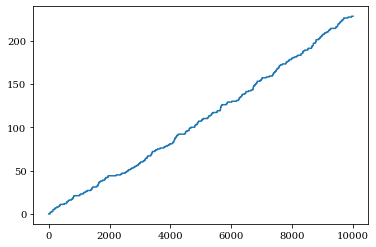

In [97]:
# Main Loop - Mapping of [0,1] -> [0,1]

# Initialization parameters:
# * Network Depth
# * Variance
# * Image Resolution

chaos_class = []

experiment_length = 10000

for experiment in range(experiment_length):
  
  if experiment % 1000 == 0:
    print("Loading...", experiment,"/",experiment_length)

  # Randomly initialize a new RNN
  variance = 2
  width = 2
  layer_in = Layer_Dense_In(1,width,2/(width+1))
  layer_out = Layer_Dense_Out(width,1,2/(width+1))
  layer_act1 = Activation_ReLU()
  layer_act2 = Activation_ReLU()

  # Set the granularity of the plot allocate memory
  X_granularity = 163
  window = 2
  zero_line = np.linspace(0,0,num=X_granularity, endpoint=True)
  test_X = np.linspace(-window,window,num=X_granularity, endpoint=True)
  test_X_plot_F0 = np.linspace(-window,window,num=X_granularity, endpoint=True)
  test_X_plot_F3 = np.linspace(-window,window,num=X_granularity, endpoint=True)

  # Function calculation, f and f^3
  for iter in range(len(test_X)):
    test_X_plot_F0[iter] = RNN_Pass(test_X_plot_F0[iter])
    test_X_plot_F3[iter] = RNN_Pass(RNN_Pass(RNN_Pass(test_X_plot_F0[iter])))

  #plt.plot(test_X,test_X)
  #plt.plot(test_X,test_X_plot_F0)
  #plt.plot(test_X,test_X_plot_F3)

  f1_points = 0
  f3_points = 0

  for check in range(1,len(test_X)-1):
    if (test_X[check-1]-test_X_plot_F0[check-1])*(test_X[check]-test_X_plot_F0[check]) < 0:
      f1_points +=1
    if (test_X[check-1]-test_X_plot_F3[check-1])*(test_X[check]-test_X_plot_F3[check]) < 0:
      f3_points +=1
    if (test_X[check]-test_X_plot_F3[check]) == 0:
      if (test_X[check-1]-test_X_plot_F3[check-1])*(test_X[check+1]-test_X_plot_F3[check+1])<0:
        f3_points +=1
    if (test_X[check]-test_X_plot_F0[check]) == 0:
      if (test_X[check-1]-test_X_plot_F0[check-1])*(test_X[check+1]-test_X_plot_F0[check+1])<0:
        f1_points +=1

  if f3_points - f1_points > 0:
    if len(chaos_class)==0:
      chaos_class.append(1)
    else:
      chaos_class.append(chaos_class[-1]+1)
  else:
    if len(chaos_class)==0:
      chaos_class.append(0)
    else:
      chaos_class.append(chaos_class[-1])

plt.plot(chaos_class)
chaos_class_percentage = []

for i in range(0,len(chaos_class)):
  chaos_class_percentage.append((chaos_class[i])/(i+1))

print("Chaos percentage = ", 100*chaos_class_percentage[-1],"%")

Text(0.5, 0, 'x')

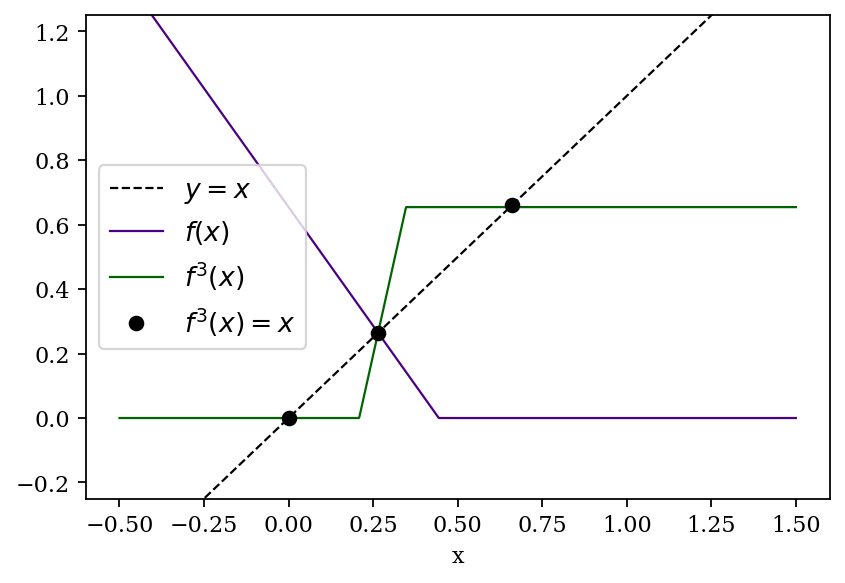

In [81]:
# Set the granularity of the plot allocate memory
X_granularity = 1631
window = 1
zero_line = np.linspace(0,0,num=X_granularity, endpoint=True)
test_X = np.linspace(-0.5,1.5,num=X_granularity, endpoint=True)
test_X_plot_F0 = np.linspace(-0.5,1.5,num=X_granularity, endpoint=True)
test_X_plot_F3 = np.linspace(-0.5,1.5,num=X_granularity, endpoint=True)

# Function calculation, f and f^3
for iter in range(len(test_X)):
  test_X_plot_F0[iter] = RNN_Pass(test_X_plot_F0[iter])
  test_X_plot_F3[iter] = RNN_Pass(RNN_Pass(RNN_Pass(test_X_plot_F0[iter])))

figure(dpi=160)
plt.rc('legend',fontsize=12)
plt.rcParams["font.family"] = "serif"
plt.ylim(-0.25,1.25)
plt.plot(test_X,test_X,'--',linewidth=1,c='black',label=r'$y=x$')
plt.plot(test_X,test_X_plot_F0,linewidth=1,c='indigo',label=r'$f(x)$')
plt.plot(test_X,test_X_plot_F3,linewidth=1,c='darkgreen',label=r'$f^3(x)$')
plt.plot(0.66,0.66,'o',c='black',label =r'$f^3(x)=x$')
plt.plot(0,0,'o',c='black')
plt.plot(0.265,0.265,'o',c='black')
plt.legend()
plt.xlabel('x')

In [55]:
print(layer_in.weights)
print(layer_in.biases)

[[-1.86269852  0.3760235 ]]
[[ 0.82744154 -0.81030444]]


In [56]:
print(layer_out.weights)
print(layer_out.biases)

[[ 0.7913013 ]
 [-1.00714872]]
[[-0.53668743]]
